In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the data
ames = pd.read_csv("data/AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

**Regular Linear Model**

In [3]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    #handle_unknown: ignore observations for unknown values in category variable
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  #ridge regression where alpha is lambda in the formula
  #can put the best alpha and lr_ratio we found from our gridsearch b/c when we gridsearch it overrides whatever we put here
  ("linear_regression", Ridge(alpha = 10))]
)

In [4]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

#scores are way better when using ridge regression

array([0.8977621 , 0.92081211, 0.80057243, 0.78711955, 0.91509487])

In [5]:
#get coefficients
pipeline_fit = lr_pipeline_1.fit(X, y)
linear_coef = pipeline_fit.named_steps["linear_regression"].coef_
linear_coef

array([-4.90649460e+03,  2.34694314e+03, -1.22917740e+03,  4.62091189e+03,
        2.20428500e+03, -3.03646802e+03, -6.17531422e+03,  6.17531422e+03,
        2.12575125e+03,  7.53147205e+03, -1.22865537e+04,  2.62933036e+03,
       -1.10363100e+04,  9.09887001e+03, -1.49378054e+03,  3.43122056e+03,
        2.93687893e+03, -2.42162664e+03, -5.15252289e+02,  1.43157683e+02,
        7.56730650e+03, -5.62761832e+03, -2.75896133e+03,  6.76115464e+02,
       -3.78227675e+02,  5.60816320e+03, -5.22993552e+03, -3.76824510e+03,
        2.45905383e+03,  5.70332014e+03, -6.25300540e+02, -4.25100049e+03,
       -8.51682634e+03,  9.07661139e+03, -1.55819272e+04, -1.11163614e+04,
        1.72302347e+03,  1.23832549e+04, -6.48871508e+03, -3.70052362e+02,
        1.59468710e+03, -1.01764141e+04, -1.10938115e+04,  4.18711022e+03,
       -1.32553889e+04,  2.75168983e+04,  2.20925274e+04, -9.78994038e+03,
       -7.01890866e+03, -6.59706874e+03, -8.97446647e+03,  9.31639420e+03,
        3.08242659e+04, -

**Ridge Regresion**

In [6]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    #handle_unknown: ignore observations for unknown values in category variable
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  #ridge regression where alpha is lambda in the formula
  #can put the best alpha and lr_ratio we found from our gridsearch b/c when we gridsearch it overrides whatever we put here
  ("ridge_regression", Ridge(alpha = 10))]
)

In [7]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

#scores are way better when using ridge regression

array([0.8977621 , 0.92081211, 0.80057243, 0.78711955, 0.91509487])

**Loss Function**

If we use a lot of betas there should be a penalty on the SSR 

Where the penalty increases as beta get better but the SSR will also go lower 

Ridge uses this penalty when computing model efficiency -> "Ridge Penalty"

Penalties calculated using B^2

In [8]:
#can tune lambdas to test multiple vals
lambdas = {"ridge_regression__alpha": [.001, .01, .1, 1, 10, 100]}

gscv = GridSearchCV(lr_pipeline_1, lambdas, cv = 5, scoring='r2')



In [9]:
gscv_fitted = gscv.fit(X, y)

#gscv_fitted.cv_results_

In [10]:
params_df = pd.DataFrame(gscv_fitted.cv_results_['params'])

results_df = params_df.assign(scores=gscv_fitted.cv_results_['mean_test_score'])

results_df.sort_values(by = 'scores', ascending = False)

,ridge_regression__alpha,scores
4,10.000,0.864272
3,1.000,0.861932
5,100.000,0.857773
2,0.100,0.856302
1,0.010,0.854186
0,0.001,0.853920


In [11]:
#get coefficients of best R^2 model
pipeline_fit = lr_pipeline_1.fit(X, y)
ridge_coef = pipeline_fit.named_steps["ridge_regression"].coef_
ridge_coef

array([-4.90649460e+03,  2.34694314e+03, -1.22917740e+03,  4.62091189e+03,
        2.20428500e+03, -3.03646802e+03, -6.17531422e+03,  6.17531422e+03,
        2.12575125e+03,  7.53147205e+03, -1.22865537e+04,  2.62933036e+03,
       -1.10363100e+04,  9.09887001e+03, -1.49378054e+03,  3.43122056e+03,
        2.93687893e+03, -2.42162664e+03, -5.15252289e+02,  1.43157683e+02,
        7.56730650e+03, -5.62761832e+03, -2.75896133e+03,  6.76115464e+02,
       -3.78227675e+02,  5.60816320e+03, -5.22993552e+03, -3.76824510e+03,
        2.45905383e+03,  5.70332014e+03, -6.25300540e+02, -4.25100049e+03,
       -8.51682634e+03,  9.07661139e+03, -1.55819272e+04, -1.11163614e+04,
        1.72302347e+03,  1.23832549e+04, -6.48871508e+03, -3.70052362e+02,
        1.59468710e+03, -1.01764141e+04, -1.10938115e+04,  4.18711022e+03,
       -1.32553889e+04,  2.75168983e+04,  2.20925274e+04, -9.78994038e+03,
       -7.01890866e+03, -6.59706874e+03, -8.97446647e+03,  9.31639420e+03,
        3.08242659e+04, -

**Plot of Ridge vs linear Regression Coeff**

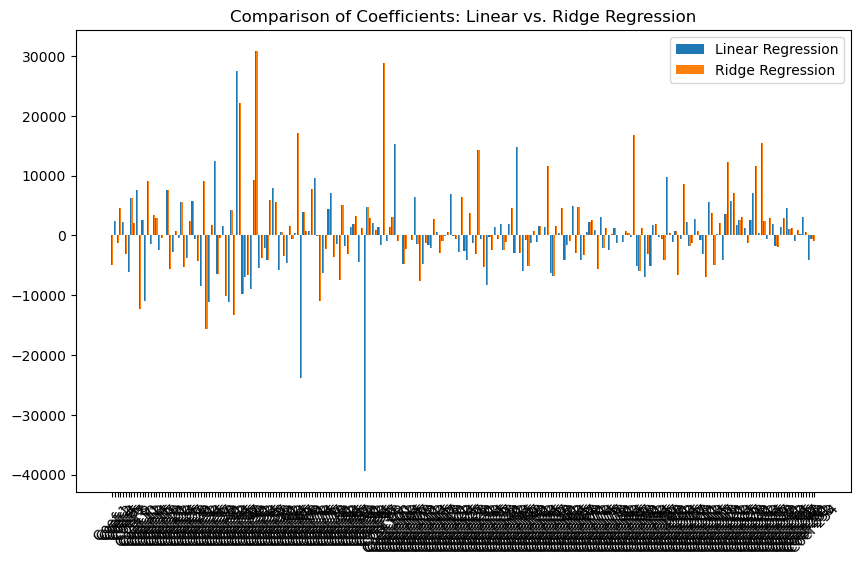

In [12]:
#Refrenced CHAT GPT for all this chunk. Mainly the first part and the x - .2 part.

# Plotting the coefficients for comparison
# Adjust this if you have feature names
# THIS PART WAS COPIED FROM CHAT GPT
labels = [f"Coef {i+1}" for i in range(len(linear_coef))] 
x = np.arange(len(labels))  # Label locations

#aspect ratio
plt.figure(figsize=(10, 6))

# plot Linear Regression Coefficients
plt.bar(x - 0.2, linear_coef, width=0.4, label='Linear Regression', align='center')

# plot Ridge Regression Coefficients
plt.bar(x + 0.2, ridge_coef, width=0.4, label='Ridge Regression', align='center')

plt.title('Comparison of Coefficients: Linear vs. Ridge Regression')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.show()


**LASSO**

Same penalty as before except penalties calculated using absolute(Betas)

consequence: some betas will estimate to be 0 if big enough

In [13]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    #handle_unknown: ignore observations for unknown values in category variable
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  #ridge regression where alpha is lambda in the formula
  #can put the best alpha and lr_ratio we found from our gridsearch b/c when we gridsearch it overrides whatever we put here
  ("lasso_regression", Lasso(alpha = 100))]
)

In [14]:
#can tune lambdas to test multiple vals
lambdas = {"lasso_regression__alpha": [.001, .01, .1, 1, 10, 100]}

gscv = GridSearchCV(lr_pipeline_1, lambdas, cv = 5, scoring='r2')



In [15]:
gscv_fitted = gscv.fit(X, y)

#gscv_fitted.cv_results_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.756e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.569e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.110e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.236e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.588e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.698e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.557e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+10, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


In [16]:
params_df = pd.DataFrame(gscv_fitted.cv_results_['params'])

results_df = params_df.assign(scores=gscv_fitted.cv_results_['mean_test_score'])

results_df.sort_values(by = 'scores', ascending = False)

,lasso_regression__alpha,scores
5,100.000,0.866931
4,10.000,0.860632
3,1.000,0.857152
2,0.100,0.856618
1,0.010,0.855606
0,0.001,0.855499


In [17]:
#get coefficients of best R^2 model
pipeline_fit = lr_pipeline_1.fit(X, y)
lasso_coef = pipeline_fit.named_steps["lasso_regression"].coef_
lasso_coef

array([-0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.40179046e+03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.91561103e+03, -0.00000000e+00,  0.00000000e+00,
       -1.02299521e+04,  5.27128450e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        5.35462663e+03, -2.63928711e+03, -0.00000000e+00,  1.77446540e+02,
       -0.00000000e+00,  2.11317738e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.14107952e+03,  0.00000000e+00,
       -0.00000000e+00,  1.41381624e+04, -7.39480667e+03, -1.20939271e+03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -6.88307419e+02, -3.10766828e+03,  0.00000000e+00,
       -4.43798790e+03,  3.63801042e+04,  2.61893814e+04, -2.59146809e+03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.40936035e+04,
        3.79963928e+04,  

**Elastic Nets**

Inlcudes both penalties when calculating penalty

where is still alpha (lambda)

and lr_ratio (a) is the ratio between the first degree penalty compared to the second degree penalty

In [18]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify", 
    #handle_unknown: ignore observations for unknown values in category variable
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  #ridge regression where alpha is lambda in the formula
  #can put the best alpha and lr_ratio we found from our gridsearch b/c when we gridsearch it overrides whatever we put here
  ("elastic_regression", ElasticNet(alpha = .01, l1_ratio = .5))]
)

In [19]:
#can tune lambdas to test multiple vals
values = {"elastic_regression__alpha": [.001, .01, .1, 1, 10, 100],
          "elastic_regression__l1_ratio": [.1, .2, .3, .4, .5, .6, .7, .8, .9]}

gscv = GridSearchCV(lr_pipeline_1, values, cv = 5, scoring='r2')



In [20]:
gscv_fitted = gscv.fit(X, y)

#gscv_fitted.cv_results_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.466e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.259e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.122e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.353e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.237e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.410e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.202e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.096e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.304e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.181e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.347e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.137e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.068e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.249e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.119e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.275e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.062e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.037e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.185e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.047e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.191e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.975e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.005e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.109e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.963e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.089e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.869e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.969e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.015e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.861e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.963e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.737e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.928e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.897e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.734e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.797e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.564e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.882e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.737e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.566e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.564e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.319e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.826e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.505e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.325e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.429e+09, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+10, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.603e+09, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.311e+09, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.951e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.280e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.846e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.354e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.144e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.277e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.999e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.789e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.184e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.943e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.683e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.467e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.189e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.534e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.429e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.470e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.258e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.103e+11, tolerance: 1.463e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.356e+11, tolerance: 1.407e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.233e+11, tolerance: 1.477e+09
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.064e+09, tolerance: 1.793e+09
  model = cd_fast.enet_coordinate_descent(


In [21]:
params_df = pd.DataFrame(gscv_fitted.cv_results_['params'])

results_df = params_df.assign(scores=gscv_fitted.cv_results_['mean_test_score'])

results_df.sort_values(by = 'scores', ascending = False)

,elastic_regression__alpha,elastic_regression__l1_ratio,scores
13,0.010,0.5,0.864268
14,0.010,0.6,0.864260
12,0.010,0.4,0.864214
15,0.010,0.7,0.864157
11,0.010,0.3,0.864119
10,0.010,0.2,0.863994
16,0.010,0.8,0.863888
9,0.010,0.1,0.863848
26,0.100,0.9,0.863687
17,0.010,0.9,0.863194


In [23]:
#get coefficients of best R^2 model
pipeline_fit = lr_pipeline_1.fit(X, y)
elastic_coef = pipeline_fit.named_steps["elastic_regression"].coef_
elastic_coef

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.064e+09, tolerance: 1.793e+09
  model = cd_fast.enet_coordinate_descent(


array([-4.36707316e+03,  2.58930223e+03, -9.19417357e+02,  3.85391906e+03,
        2.21693926e+03, -3.37367006e+03, -5.42672957e+03,  5.42672956e+03,
        1.86723305e+03,  6.98591112e+03, -1.10890057e+04,  2.23386196e+03,
       -1.09990714e+04,  8.99233117e+03, -1.25763948e+03,  3.26437977e+03,
        2.26595098e+03, -1.82550578e+03, -4.39445198e+02, -1.94736847e+01,
        7.32006891e+03, -5.43410203e+03, -2.44365652e+03,  5.78163411e+02,
       -6.16362027e+02,  5.18209052e+03, -4.56472859e+03, -3.87569981e+03,
        1.90088683e+03,  4.70492586e+03,  3.00238837e+02, -3.50912503e+03,
       -8.19981053e+03,  9.22438676e+03, -1.44898572e+04, -1.06699450e+04,
        1.14082112e+03,  9.02194540e+03, -5.36482423e+03, -2.84779674e+02,
        1.44588571e+03, -9.23421603e+03, -1.01670815e+04,  3.40782016e+03,
       -1.23392127e+04,  2.60565188e+04,  2.09499486e+04, -8.52307157e+03,
       -5.88863748e+03, -5.64447620e+03, -8.43567282e+03,  8.49411921e+03,
        2.82637493e+04, -